<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.722003,98.744258,44.710572,44.400306,0.010308,251.587446,251.577806,0.009640
1,0.0,1.0,22.142942,81.485070,70.639192,20.866816,-0.001389,205.132632,205.131838,0.000794
2,0.0,2.0,48.770260,61.305759,76.059740,88.027369,-0.011244,284.151884,284.162577,-0.010693
3,0.0,3.0,79.215570,46.389349,57.282438,57.993025,0.021284,250.901666,250.877496,0.024170
4,0.0,4.0,31.435196,45.583744,63.157681,49.220901,0.017897,199.415419,199.394521,0.020898
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.061081,42.061232,28.760493,79.582848,-0.003116,200.462538,200.463543,-0.001005
119996,999.0,116.0,34.208001,77.645829,55.531120,34.111946,0.000076,211.496971,211.496573,0.000398
119997,999.0,117.0,71.019259,22.607967,74.702028,91.975342,0.017924,270.322520,270.299904,0.022616
119998,999.0,118.0,93.948021,60.385325,45.901420,74.561510,0.003643,284.799919,284.794611,0.005308


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.722003,98.744258,44.710572,44.400306,0.010308,251.587446,251.577806,0.009640
1,0.0,1.0,22.142942,81.485070,70.639192,20.866816,-0.001389,205.132632,205.131838,0.000794
2,0.0,2.0,48.770260,61.305759,76.059740,88.027369,-0.011244,284.151884,284.162577,-0.010693
3,0.0,3.0,79.215570,46.389349,57.282438,57.993025,0.021284,250.901666,250.877496,0.024170
4,0.0,4.0,31.435196,45.583744,63.157681,49.220901,0.017897,199.415419,199.394521,0.020898
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.061081,42.061232,28.760493,79.582848,-0.003116,200.462538,200.463543,-0.001005
119996,999.0,116.0,34.208001,77.645829,55.531120,34.111946,0.000076,211.496971,211.496573,0.000398
119997,999.0,117.0,71.019259,22.607967,74.702028,91.975342,0.017924,270.322520,270.299904,0.022616
119998,999.0,118.0,93.948021,60.385325,45.901420,74.561510,0.003643,284.799919,284.794611,0.005308


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.722003  98.744258  44.710572  44.400306  0.010308  251.587446   
      1.0    22.142942  81.485070  70.639192  20.866816 -0.001389  205.132632   
      2.0    48.770260  61.305759  76.059740  88.027369 -0.011244  284.151884   
      3.0    79.215570  46.389349  57.282438  57.993025  0.021284  250.901666   
      4.0    31.435196  45.583744  63.157681  49.220901  0.017897  199.415419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.061081  42.061232  28.760493  79.582848 -0.003116  200.462538   
      116.0  34.208001  77.645829  55.531120  34.111946  0.000076  211.496971   
      117.0  71.019259  22.607967  74.702028  91.975342  0.017924  270.322520   
      118.0  93.948021  60.385325  45.901420  74.561510  0.003643  284.799919   
      119.0  98.180575  26.482348  50.925210  28.185879 -0.016109  213.757902   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.577806  0.009640  
      1.0    205.131838  0.000794  
      2.0    284.162577 -0.010693  
      3.0    250.877496  0.024170  
      4.0    199.394521  0.020898  
...                 ...       ...  
999.0 115.0  200.463543 -0.001005  
      116.0  211.496573  0.000398  
      117.0  270.299904  0.022616  
      118.0  284.794611  0.005308  
      119.0  213.769573 -0.011671  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.722003  98.744258  44.710572  44.400306  0.010308  251.587446   
      1.0    22.142942  81.485070  70.639192  20.866816 -0.001389  205.132632   
      2.0    48.770260  61.305759  76.059740  88.027369 -0.011244  284.151884   
      3.0    79.215570  46.389349  57.282438  57.993025  0.021284  250.901666   
      4.0    31.435196  45.583744  63.157681  49.220901  0.017897  199.415419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.061081  42.061232  28.760493  79.582848 -0.003116  200.462538   
      116.0  34.208001  77.645829  55.531120  34.111946  0.000076  211.496971   
      117.0  71.019259  22.607967  74.702028  91.975342  0.017924  270.322520   
      118.0  93.948021  60.385325  45.901420  74.561510  0.003643  284.799919   
      119.0  98.180575  26.482348  50.925210  28.185879 -0.016109  213.757902   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.577806  0.009640  
      1.0    205.131838  0.000794  
      2.0    284.162577 -0.010693  
      3.0    250.877496  0.024170  
      4.0    199.394521  0.020898  
...                 ...       ...  
999.0 115.0  200.463543 -0.001005  
      116.0  211.496573  0.000398  
      117.0  270.299904  0.022616  
      118.0  284.794611  0.005308  
      119.0  213.769573 -0.011671  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.722003,98.744258,44.710572,44.400306,0.010308,251.587446,251.577806,0.009640
1,0.0,1.0,22.142942,81.485070,70.639192,20.866816,-0.001389,205.132632,205.131838,0.000794
2,0.0,2.0,48.770260,61.305759,76.059740,88.027369,-0.011244,284.151884,284.162577,-0.010693
3,0.0,3.0,79.215570,46.389349,57.282438,57.993025,0.021284,250.901666,250.877496,0.024170
4,0.0,4.0,31.435196,45.583744,63.157681,49.220901,0.017897,199.415419,199.394521,0.020898
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,40.061081,42.061232,28.760493,79.582848,-0.003116,200.462538,200.463543,-0.001005
119996,999.0,116.0,34.208001,77.645829,55.531120,34.111946,0.000076,211.496971,211.496573,0.000398
119997,999.0,117.0,71.019259,22.607967,74.702028,91.975342,0.017924,270.322520,270.299904,0.022616
119998,999.0,118.0,93.948021,60.385325,45.901420,74.561510,0.003643,284.799919,284.794611,0.005308


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.722003  98.744258  44.710572  44.400306  0.010308  251.587446   
      1.0    22.142942  81.485070  70.639192  20.866816 -0.001389  205.132632   
      2.0    48.770260  61.305759  76.059740  88.027369 -0.011244  284.151884   
      3.0    79.215570  46.389349  57.282438  57.993025  0.021284  250.901666   
      4.0    31.435196  45.583744  63.157681  49.220901  0.017897  199.415419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  40.061081  42.061232  28.760493  79.582848 -0.003116  200.462538   
      116.0  34.208001  77.645829  55.531120  34.111946  0.000076  211.496971   
      117.0  71.019259  22.607967  74.702028  91.975342  0.017924  270.322520   
      118.0  93.948021  60.385325  45.901420  74.561510  0.003643  284.799919   
      119.0  98.180575  26.482348  50.925210  28.185879 -0.016109  213.757902   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    251.577806  0.009640  
      1.0    205.131838  0.000794  
      2.0    284.162577 -0.010693  
      3.0    250.877496  0.024170  
      4.0    199.394521  0.020898  
...                 ...       ...  
999.0 115.0  200.463543 -0.001005  
      116.0  211.496573  0.000398  
      117.0  270.299904  0.022616  
      118.0  284.794611  0.005308  
      119.0  213.769573 -0.011671  

[120000 rows x 8 columns]

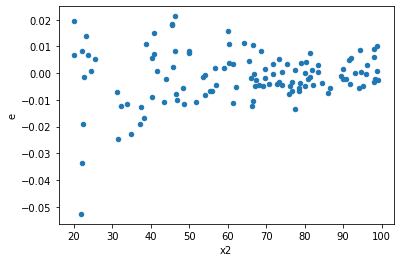

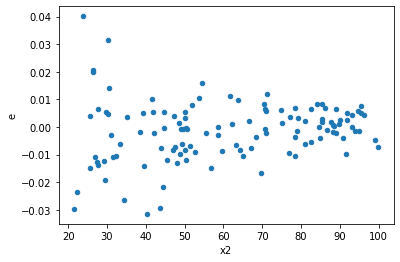

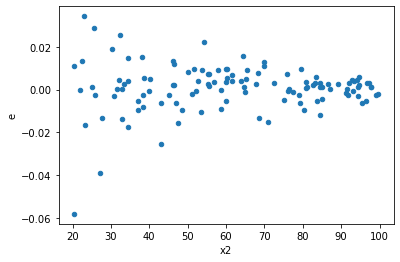

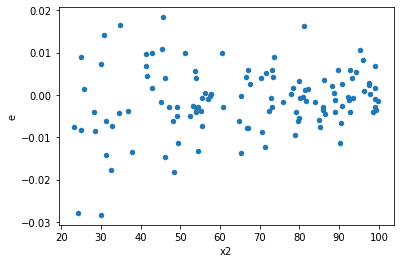

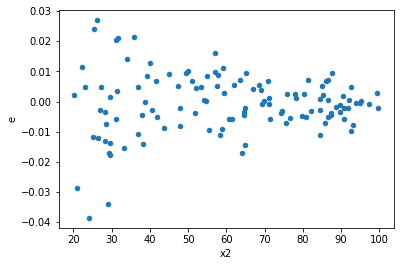

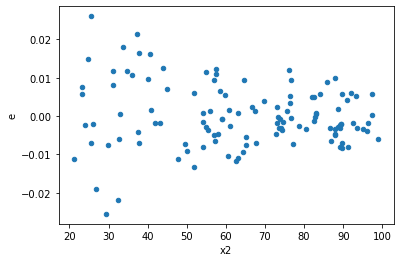

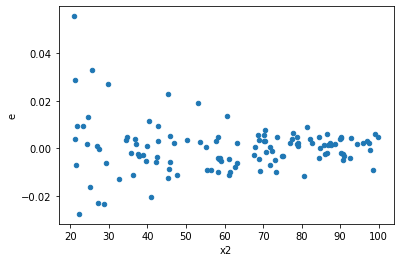

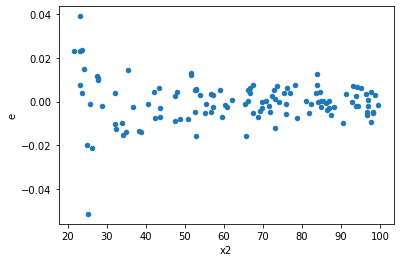

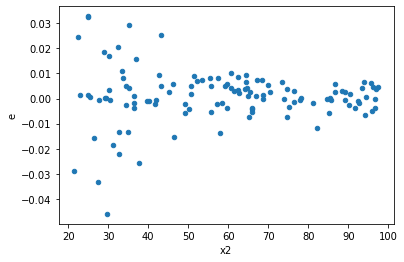

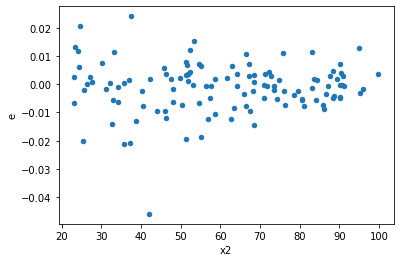

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,44.0,44.0,0.004195329501570367,0.007568869310510856,9.534839776296289e-05,0.0001720197570570649,1.8041179620522605,0.05333564751754172,0.9733321762412291,0.02666782375877086,Reject005=1 : Homoscedasticity
51.0,44.0,44.0,0.004980286006287048,0.005882035841295137,0.00011318831832470563,0.00013368263275670767,1.1810638653823762,0.5833507148974477,0.7083246425512761,0.29167535744872386,Reject005=1 : Homoscedasticity
125.0,44.0,44.0,0.005561691915142471,0.0059040421439077884,0.00012640208898051072,0.00013418277599790428,1.0615550508709806,0.8438422618704076,0.5780788690647962,0.4219211309352038,Reject005=1 : Homoscedasticity
138.0,44.0,44.0,0.004714648222964367,0.006525599146009955,0.00010715109597646288,0.00014830907150022624,1.3841115683296812,0.2847737638825749,0.8576131180587125,0.14238688194128746,Reject005=1 : Homoscedasticity
161.0,44.0,44.0,0.003912305034707813,0.00500086246429229,8.891602351608665e-05,0.00011365596509755205,1.278239406162709,0.4187696663052203,0.7906151668473899,0.20938483315261014,Reject005=1 : Homoscedasticity
202.0,44.0,44.0,0.004646215005478927,0.004714175959730151,0.00010559579557906651,0.00010714036272113981,1.0146271651594003,0.9618051969699106,0.5190974015150447,0.4809025984849553,Reject005=1 : Homoscedasticity
230.0,44.0,44.0,0.0063437257437686835,0.0065804798093990185,0.0001441755850856519,0.00014955635930452314,1.0373209806339583,0.9038225382071372,0.5480887308964314,0.4519112691035686,Reject005=1 : Homoscedasticity
314.0,44.0,44.0,0.004991980482418333,0.005118522603165981,0.00011345410187314393,0.0001163300591628632,1.025349081630693,0.9342061440808567,0.5328969279595717,0.46710307204042834,Reject005=1 : Homoscedasticity
339.0,44.0,44.0,0.00643968149020788,0.007359623830369219,0.00014635639750472455,0.0001672641779629368,1.142855254807275,0.6597947015892782,0.6701026492053609,0.3298973507946391,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.005399120735277471,0.0026335662901152148,0.00012270728943812435,5.9853779320800334e-05,0.48777688428185717,0.019132463449717994,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,0.00539340384228294,0.0024955234847183635,0.000122577360051885,5.6716442834508264e-05,0.4626991706339663,0.012028593448512545,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,0.004195329501570367,0.007568869310510856,9.534839776296289e-05,0.0001720197570570649,1.8041179620522605,0.05333564751754172,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,0.003908477921146457,0.001735502968395019,8.882904366241949e-05,3.944324928170498e-05,0.4440355052296039,0.008239533520737178,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,0.007032823613136813,0.0024252153874725147,0.00015983690029856392,5.5118531533466245e-05,0.3448423451062224,0.0005957647193761126,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,0.00333001413896579,0.0023350994561976597,7.568213952194976e-05,5.307044218631045e-05,0.7012280905578608,0.24303196759899195,Reject005=1 : Homoscedasticity
6.0,44.0,44.0,0.00445944982947076,0.002670665101486573,0.00010135113248797182,6.069693412469484e-05,0.5988777099446644,0.09262299997573781,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,0.005783959149948772,0.001240902270664695,0.00013145361704429027,2.8202324333288523e-05,0.21454201845040444,1.1999905009997335e-06,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,0.008248428365268625,0.002019610709007443,0.00018746428102883237,4.5900243386532795e-05,0.24484794188325001,7.866442397405236e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    788
Reject005=1 : Homoscedasticity      212
Name: Result_test, dtype: int64